# Problems Notebook

<p>Computer Infrastructure </p>   <p>Author: Gerry Callaghan</p>

### Problem 1: Data from yfinance

In [1]:
# External packages I use in this project

# dates and times - among other things, I use this package to format dates into strings for that i can append to filenames.
import datetime as dt

# data frames - I use pandas to handle tabular data imported from yFinance's csv file.
import pandas as pd

# need numpy to create two arrays for chats
import numpy as np

# plot graphs - I use matplotlib to plot graphs of the stocks.
import matplotlib.pyplot as plt 

# I might use this to reformat dates for my axes https://stackoverflow.com/questions/33743394/matplotlib-dateformatter-for-axis-label-not-working
import matplotlib.dates as mdates

# Yahoo Finance is not part of the cental python repository 
# but is an open-source package available that can be installed via conda-forge.
# This open-source library that provides a reliable, threaded, and pythonic way to download historical market data from Yahoo! Finance.
import yfinance as yf
# I had issues with older versions of yfinance, so I want to confirm the version I'm using. This will also help with debugging if I encounter any issues.
print(yf.__version__)

# There are known issues with yfinance and the default user-agent, so i need to spoof my user-agent
# You can read more about this issue here: https://www.reddit.com/r/learnpython/comments/1kc3miq/yfinance_error_yfratelimiterrortoo_many_requests/
# Details on how requests from the curl_cffi package can be imported can be found here: https://pypi.org/project/curl-cffi/
import curl_cffi.requests as requests
session = requests.Session(impersonate="chrome")

# this is needed to handle file paths
import os

# to read in csv files
import csv 


0.2.66



## Objective: Write a function called get_data() that will download stock data from Yahoo Finance.

#### Method: The get_data() function will take our "Fangs" stock ticker symbols as input, and return a pandas DataFrame containing the stock data for that ticker

In [2]:
'''
# Not relevant in this exercise, because we are only looking at FAANG stocks, 
# but it might be the case that in the future we want to read in other stock tickers.
portfolio = []
print(f"Please enter, capital letters, the stock tickers you want to download data for, type quit to finish")
next_stock = str(input("Enter stock ticker (type quit to finish): "))
while next_stock != 'quit':
        portfolio.append (next_stock)
        next_stock = str(input("Enter another stock ticker (type quit to finish): "))   
print (f"Portfolio: {portfolio}\n") 
'''

# I want to remove the apostrophe because the tickers command in yfinance does not have apostrophes
# so we create a string of stock tickers separated by spaces
portfolio = ['AAPL', 'AMZN','GOOG', 'META','NFLX']  # FANG stocks
#print(f"{len(portfolio)}") # this gets the number of stocks in our portfolio 

stocks = portfolio[0]
for stock in portfolio[1:]:
        stocks += (" " + stock)
print(f"The tickers for our stocks are: {stocks}\n") # This will print the ticker objects for each of our FANG stocks.

# From here URL= "https://ranaroussi.github.io/yfinance/", 
# it says that for multiple tickers we need only have whitespace between each ticker symbol.
# That is, it takes a single string with spaces between each ticker symbol.

# So, for the FAANG stocks it looks like this, remember we are passing in our session object to avoid user-agent issues.
tickers = yf.Tickers(stocks, session = session)
print(f"The tickers for our stocks are: {tickers.tickers}")  # This will print the ticker objects for each of our FANG stocks.

# Let's now confirm that indeed yfinance has understood our ticker symbols

stocks = portfolio[0]
for stock in portfolio[0:]:
        print(f"The long name for this stock is {tickers.tickers[stock].info['longName']} and the info for this stock is: {tickers.tickers[stock].info}")
        stocks += (" " + stock)


The tickers for our stocks are: AAPL AMZN GOOG META NFLX

The tickers for our stocks are: {'AAPL': yfinance.Ticker object <AAPL>, 'AMZN': yfinance.Ticker object <AMZN>, 'GOOG': yfinance.Ticker object <GOOG>, 'META': yfinance.Ticker object <META>, 'NFLX': yfinance.Ticker object <NFLX>}
The long name for this stock is Apple Inc. and the info for this stock is: {'address1': 'One Apple Park Way', 'city': 'Cupertino', 'state': 'CA', 'zip': '95014', 'country': 'United States', 'phone': '(408) 996-1010', 'website': 'https://www.apple.com', 'industry': 'Consumer Electronics', 'industryKey': 'consumer-electronics', 'industryDisp': 'Consumer Electronics', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose ta

In [3]:
# So, we have verified that yfinance has correctly understood our ticker symbols.

# Now, let's download the historical data for our FANG stocks over the last 5 days with hourly intervals.
# I will use the yfinance download() function for this purpose.
# Details of this function can be found here https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html
# it says the format of the command is as follows:
# yfinance.download(tickers, start=None, end=None, actions=False, threads=True, ignore_tz=None, group_by='column', auto_adjust=None, 
# back_adjust=False, repair=False, keepna=False, progress=True, period=None, interval='1d', prepost=False, proxy=<object object>, 
# rounding=False, timeout=10, session=None, multi_level_index=True) 

# From URL= "https://algotrading101.com/learn/yfinance-guide/" 5 days is written as '5d' within the downloan() functio, 
# while I want hourly data, so I set interval='1h' for 1 hour intervals.

# So, I download the data from yahoo finance into a dataframe as follows, specifying a five day period (5d) at one hour intervals (1h) 
df = yf.download(portfolio, period='5d', interval='1h', session=session)

# I'm using portfolio here because it is a list of the stock tickers I want to download, 
# but I could have hardcoded them as well as shown in the next line
#df = yf.download(['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG'], period='5d', interval='1h', session=session)

# Aside: in the previous command, I had no comma between the stock tickers, 
# but here in this download function, because they are in a tuple, I need commas, 
# and each have apostrophes to indicate they are strings
# the function is download(), and it takes variables, ticker/tickers and period
# and for persistence, i'm importing it into a dataframe called df

/tmp/ipykernel_12626/4115696484.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(portfolio, period='5d', interval='1h', session=session)
[*********************100%***********************]  5 of 5 completed


In [4]:
# Let's now see what is in the first few rows of that dataframe called df
# print(f"The stock prices for the FANGS stocks are as follows:\n{df.head()}\n")
# print(f"The type of dataframe I have is: {type(df)}\n")

# Many of these columns I don't need, so I'll create a list of columns to drop
# in lecture 28-all-closing-plots.mkv leacturer just used df['Close'] to get the closing prices
# but here i will drop the columns I don't need

# Instead of hardcoding the list of superfluous columns for our stocks, 
# # because the number of stocks might change
#  I will create it programmatically where I pull in the stocks listed in my portfolio variable above     
stock = portfolio[0]
potential_drop_cols_list = ()
i = 0

while i < len(portfolio):
        
        column1 = ("High",portfolio[i])
        column2 = ("Low",portfolio[i])
        column3 =("Open",portfolio[i])
        column4 =("Volume",portfolio[i])
        stock = (column1,column2,column3,column4)
        # now I will add the columns in this tuple to my total potential drop columns list
        potential_drop_cols_list = potential_drop_cols_list + stock
        i+=1

drop_cols_list = list(potential_drop_cols_list)
print(f"The columns that i will be dropping from my dataframe are: \n{(drop_cols_list)}\n")

# now I will drop this list of columns from mu original dataframe
df.drop(columns=drop_cols_list, inplace=True)

# Let's view the new columns
headers = df.columns.tolist()
print(f"The current stock names are: {headers}\n")

# All my prices are closing prices, so I will drop the "closing" prefix from each of my column names
# I create new column names as follows
# Ideally I would use the strip function to remove the word Close but I couldn't get it to work for me, so hardcoding it for now.

new_stock_names = ["Apple","Amazon","Google","Meta","Netflix"]
print(f"The new stock names are: ({new_stock_names})\n")
# now set the column names of our dataframe equal to those column names
df.columns = new_stock_names

#headers = df.columns.tolist()
#print(f"{headers}\n")

#print(f"{df}\n")


The columns that i will be dropping from my dataframe are: 
[('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL'), ('High', 'AMZN'), ('Low', 'AMZN'), ('Open', 'AMZN'), ('Volume', 'AMZN'), ('High', 'GOOG'), ('Low', 'GOOG'), ('Open', 'GOOG'), ('Volume', 'GOOG'), ('High', 'META'), ('Low', 'META'), ('Open', 'META'), ('Volume', 'META'), ('High', 'NFLX'), ('Low', 'NFLX'), ('Open', 'NFLX'), ('Volume', 'NFLX')]

The current stock names are: [('Close', 'AAPL'), ('Close', 'AMZN'), ('Close', 'GOOG'), ('Close', 'META'), ('Close', 'NFLX')]

The new stock names are: (['Apple', 'Amazon', 'Google', 'Meta', 'Netflix'])



In [5]:
df.index

DatetimeIndex(['2025-11-21 14:30:00+00:00', '2025-11-21 15:30:00+00:00',
               '2025-11-21 16:30:00+00:00', '2025-11-21 17:30:00+00:00',
               '2025-11-21 18:30:00+00:00', '2025-11-21 19:30:00+00:00',
               '2025-11-21 20:30:00+00:00', '2025-11-24 14:30:00+00:00',
               '2025-11-24 15:30:00+00:00', '2025-11-24 16:30:00+00:00',
               '2025-11-24 17:30:00+00:00', '2025-11-24 18:30:00+00:00',
               '2025-11-24 19:30:00+00:00', '2025-11-24 20:30:00+00:00',
               '2025-11-25 14:30:00+00:00', '2025-11-25 15:30:00+00:00',
               '2025-11-25 16:30:00+00:00', '2025-11-25 17:30:00+00:00',
               '2025-11-25 18:30:00+00:00', '2025-11-25 19:30:00+00:00',
               '2025-11-25 20:30:00+00:00', '2025-11-26 14:30:00+00:00',
               '2025-11-26 15:30:00+00:00', '2025-11-26 16:30:00+00:00',
               '2025-11-26 17:30:00+00:00', '2025-11-26 18:30:00+00:00',
               '2025-11-26 19:30:00+00:00', '2025-1

In [6]:
# I now print our dataframe out to a CSV file
# I will use the to_csv funtion, you can read about it here https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

# Before I export it out, I want to give our csv file a name based on today's date

# We assign a new variable today equal to the current date and time
now = dt.datetime.now()

# I format the date and time of today according to a manner I want
# more on this can be found here docs.python.org/3/library/datetime.html#format-codes 
# and docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes
print(now.strftime("%Y%m%d-%H%M%S"))

FILENAME = now.strftime('%Y%m%d-%H%M%S')+'.csv'
# we want to put the csv in a separate folder in the parent directory
DATADIR = "../data/"
# the directory an filename concatenated is then the fullpath
FULLPATH = DATADIR + FILENAME  
# now to print out to this csv
print(df.to_csv(FULLPATH))


20251129-212923
None


## Problem 2: Plotting the closing prices.

In [7]:
FILENAME = now.strftime('%Y%m%d-%H%M%S')+'.csv'
DATADIR = "../data/"
FULLPATH = DATADIR + FILENAME   

fp = pd.read_csv(FULLPATH)
new_column_names = ["Date","Apple","Amazon","Google","Meta","Netflix"]
fp.columns = new_column_names 
fp.set_index('Date', inplace=True)
print(f"{fp}")

                                Apple      Amazon      Google        Meta  \
Date                                                                        
2025-11-21 14:30:00+00:00  269.850006  216.264999  296.760010  585.119995   
2025-11-21 15:30:00+00:00  270.899994  218.574997  300.329987  587.742676   
2025-11-21 16:30:00+00:00  270.549988  219.639999  296.489990  592.979980   
2025-11-21 17:30:00+00:00  270.980011  218.722000  297.290009  591.625000   
2025-11-21 18:30:00+00:00  272.609985  222.050003  302.660095  597.548584   
2025-11-21 19:30:00+00:00  271.369995  220.184998  299.945007  594.070007   
2025-11-21 20:30:00+00:00  271.489990  220.645004  299.660004  594.469971   
2025-11-24 14:30:00+00:00  273.095001  225.869995  316.879486  611.349976   
2025-11-24 15:30:00+00:00  275.000000  224.949005  314.480011  611.652893   
2025-11-24 16:30:00+00:00  274.850006  224.619995  315.119995  614.239990   
2025-11-24 17:30:00+00:00  276.119995  224.970001  317.369995  613.940002   

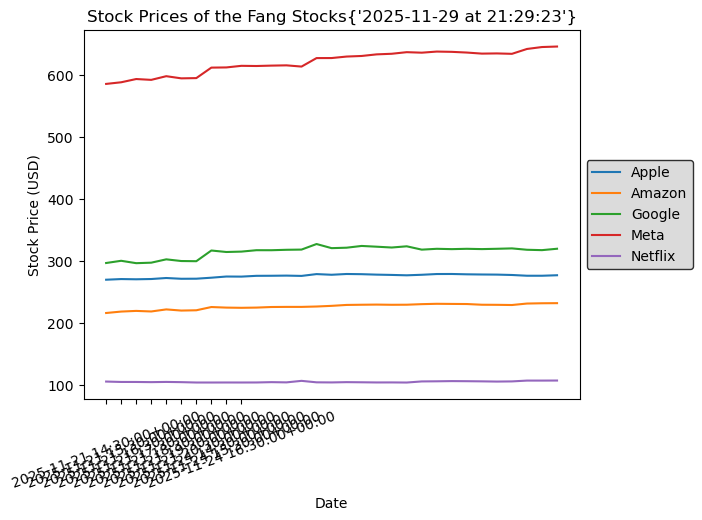

In [8]:
# I will use numpy to create arrays, one for my dates and an array for each of my stocks
# from https://www.geeksforgeeks.org/python/use-multiple-columns-in-a-matplotlib-legend/
x = np.array(fp.index)
y1 = np.array(fp["Apple"])
y2 = np.array(fp["Amazon"])
y3 = np.array(fp["Google"])
y4 = np.array(fp["Meta"])
y5 = np.array(fp["Netflix"])

# this is saying what the first day is (that is 5 days prior to today)
date_from = dt.date.today()- dt.timedelta(days=5) 
date_to = dt.date.today()
dates = [dt.timedelta(days=-5),dt.timedelta(days=-4),dt.timedelta(days=-3),dt.timedelta(days=-2),dt.timedelta(days=-1)]

#values=[y1,y2,y3,y4,y5]

#fig, ax = plt.subplots()
#ax.plot(dates,values)

plt.xlabel("Date")
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xticks.html
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(np.arange(10), rotation=20)
plt.ylabel("Stock Price (USD)")

          
title = "Stock Prices of the Fang Stocks" + str({now.strftime('%Y-%m-%d at %H:%M:%S')})
plt.title(title)

plt.plot(x,y1, label="Apple")
plt.plot(x,y2, label="Amazon")
plt.plot(x,y3, label="Google")
plt.plot(x,y4, label="Meta")
plt.plot(x,y5, label="Netflix")

#plt.legend(("Apple", "Amazon", "Google", "Meta", "Netflix"),("Apple", "Amazon", "Google", "Meta", "Netflix"))
plt.legend(ncol=1,loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=10, frameon=True, edgecolor='black', facecolor='lightgray',columnspacing=1.5)

plt.show()



In [9]:
# from Gemini AI, I will create a directory as follows
directory_path = "../plots"
try:
    os.mkdir(directory_path)
    print(f"Directory '{directory_path}' created successfully one level up.")
except FileExistsError:
    print(f"Directory '{directory_path}' already exists.")
except OSError as e:
    print(f"Error creating directory: {e}")

# # up one levels to root and then down into plots
filename = (directory_path) + "/" + now.strftime('%Y%m%d-%H%M%S') + "_stock_prices_of_the_fangs_stocks" + ".png"

print(f"{filename}")

plt.savefig(filename)

Directory '../plots' already exists.
../plots/20251129-212923_stock_prices_of_the_fangs_stocks.png


<Figure size 640x480 with 0 Axes>

# end